# January Fuel Delivery Performance and Revenue Analysis

## Intro

This analysis focuses on the operational performance and revenue trends for a fuel delivery company during the month of January. The dataset includes key metrics related to driver performance, delivery status, product types, customer information, and financial data. The goal is to assess the performance of drivers, the efficiency of deliveries, and to identify patterns in revenue and customer behavior. By performing exploratory data analysis (EDA), including correlation analysis, visualizations, and trend observations, we aim to uncover insights that can inform decision-making, improve delivery operations, and optimize revenue generation. Key areas of focus include driver fuel efficiency, load and unload times, delivery success rates, and revenue performance across different customers and product types.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("fuel_delivery_data_updated.csv")

### Data Columns

Trip Details

1. Trip ID: A unique identifier for each trip, formatted as TRIP-XXXX.
2. Date and Time: The timestamp indicating the specific date and time of the trip

Delivery and Distance

3. Distance Driven (miles_driven): The distance covered during the trip, ranging from 50 to 500 miles.
4. Load Type: The type of fuel being transported (Diesel, Gasoline, or Ethanol).
5. Delivery Status: The trip’s outcome—On-Time, Late, or Incomplete.

Vehicle Performance

6. Fuel Efficiency (MPG): The vehicle’s fuel efficiency during the trip, measured in miles per gallon.
7. Diesel Fuel Used (gallons): The amount of diesel consumed during the trip.

Driver Information

8. Driver Name: One of 10 randomly generated driver names.
9. Driver Experience (years): The years of driving experience the driver has.
10. Hours Worked: The number of hours the driver worked during the trip.

Financial Metrics

11. Driver Profit ($): The profit earned by the driver for the trip.
12.	Delivery Cost ($): The total cost incurred for the delivery.
13.	Fuel Cost ($): The total cost of diesel used during the trip.
14.	Profit Margin (%): The profit percentage achieved.
15.	Cost per Mile ($): The delivery cost per mile.
16.	Profit per Mile ($): The profit generated per mile driven.
17.	Fuel Cost per Mile ($): The cost of fuel per mile.
18.	Total Revenue ($): The total revenue generated from the delivery.

Load/Unload Times

19.	Load Time (hrs): The time taken to load the cargo.
20.	Unload Time (hrs): The time taken to unload the cargo.
21.	Total Load/Unload Time (hrs): The combined time for loading and unloading.

Customer and Order Details

22.	Customer Location: The city where the delivery occurred.
23.	Order Quantity (gallons): The quantity of fuel ordered by the customer.
24.	Fuel Prices ($/gallon): The price of diesel per gallon.
25.	Delivery Frequency (days): How often deliveries occur for a customer in a month.

### Data Summary

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Trip ID                         1000 non-null   object 
 1   Date and Time                   1000 non-null   object 
 2   Distance Driven (miles_driven)  1000 non-null   int64  
 3   Load Type                       1000 non-null   object 
 4   Delivery Status                 1000 non-null   object 
 5   Fuel Efficiency (MPG)           1000 non-null   float64
 6   Diesel Fuel Used (gallons)      1000 non-null   int64  
 7   Driver Name                     1000 non-null   object 
 8   Driver Experience (years)       1000 non-null   int64  
 9   Hours Worked                    1000 non-null   int64  
 10  Driver Profit ($)               1000 non-null   int64  
 11  Delivery Cost ($)               1000 non-null   int64  
 12  Fuel Cost ($)                   100

By looking at the data summary, you can see that the dataset consists of objects, float and integer types. This dataset contains 1000 rows and 25 columns. By looking at the summary, you can see that there are no missing values.

### Sample of Data

In [4]:
data.head(10)

,Trip ID,Date and Time,Distance Driven (miles_driven),Load Type,Delivery Status,Fuel Efficiency (MPG),Diesel Fuel Used (gallons),Driver Name,Driver Experience (years),Hours Worked,...,Profit per Mile ($),Fuel Cost per Mile ($),Total Revenue ($),Load Time (hrs),Unload Time (hrs),Total Load/Unload Time (hrs),Customer Location,Order Quantity (gallons),Fuel Prices ($/gallon),Delivery Frequency (days)
0,TRIP-0001,2023-01-01 00:00:00.000000000,152,Ethanol,Incomplete,6.57,210,Driver_3,3,14,...,0.64,1.57,8189,2.91,2.64,3.33,CityA,5509,4.14,17
1,TRIP-0002,2023-01-01 08:44:41.081081081,485,Diesel,Late,7.09,168,Driver_3,6,7,...,2.18,1.87,6386,2.60,2.38,3.35,CityE,2082,3.80,16
2,TRIP-0003,2023-01-01 17:29:22.162162162,398,Diesel,Incomplete,7.39,198,Driver_3,7,9,...,2.61,1.02,7942,2.34,2.33,2.79,CityD,9424,4.96,20
3,TRIP-0004,2023-01-02 02:14:03.243243243,320,Ethanol,Incomplete,6.38,258,Driver_10,20,9,...,1.50,1.39,9759,2.08,2.05,5.44,CityB,8376,4.02,22
4,TRIP-0005,2023-01-02 10:58:44.324324324,156,Gasoline,Incomplete,7.53,199,Driver_3,23,7,...,1.81,1.85,1244,2.58,1.19,2.59,CityA,2927,4.10,6
5,TRIP-0006,2023-01-02 19:43:25.405405405,121,Diesel,On-Time,7.31,225,Driver_8,25,8,...,1.50,0.36,1020,1.99,1.80,5.63,CityA,6221,4.42,7
6,TRIP-0007,2023-01-03 04:28:06.486486486,238,Diesel,Incomplete,5.20,86,Driver_1,27,8,...,1.25,1.59,9585,1.60,2.91,3.13,CityE,8923,3.97,14
7,TRIP-0008,2023-01-03 13:12:47.567567567,70,Diesel,Late,5.14,192,Driver_7,18,6,...,2.51,1.31,6767,1.32,2.99,5.60,CityB,5430,3.45,11
8,TRIP-0009,2023-01-03 21:57:28.648648648,152,Ethanol,Late,6.86,212,Driver_6,11,11,...,1.18,1.28,4515,2.30,2.46,5.16,CityB,4853,4.07,12
9,TRIP-0010,2023-01-04 06:42:09.729729729,171,Diesel,Late,6.04,269,Driver_4,19,13,...,2.31,0.73,2910,2.86,1.46,4.33,CityB,8332,4.89,14


### Data Shape

In [5]:
data.shape

(1000, 25)

This dataset contains 1000 rows with 25 different columns.

### Duplicated Values

In [6]:
data.duplicated().sum()

np.int64(0)

There are 0 duplicated rows in the dataset.

### Renaming column Names

In [7]:
data.columns

Index(['Trip ID', 'Date and Time', 'Distance Driven (miles_driven)',
       'Load Type', 'Delivery Status', 'Fuel Efficiency (MPG)',
       'Diesel Fuel Used (gallons)', 'Driver Name',
       'Driver Experience (years)', 'Hours Worked', 'Driver Profit ($)',
       'Delivery Cost ($)', 'Fuel Cost ($)', 'Profit Margin (%)',
       'Cost per Mile ($)', 'Profit per Mile ($)', 'Fuel Cost per Mile ($)',
       'Total Revenue ($)', 'Load Time (hrs)', 'Unload Time (hrs)',
       'Total Load/Unload Time (hrs)', 'Customer Location',
       'Order Quantity (gallons)', 'Fuel Prices ($/gallon)',
       'Delivery Frequency (days)'],
      dtype='object')

In [8]:
data = data.rename(
    columns=
    {
        'Trip ID': "trip_id", 
        'Date and Time': "date_and_time", 
        'Distance Driven (miles_driven)': "distance_driven_miles",
       'Load Type': "load_type", 
       'Delivery Status': "delivery_status", 
       'Fuel Efficiency (MPG)': "fuel_efficiency_mpg",
       'Diesel Fuel Used (gallons)': "diesel_used_gallons", 
       'Driver Name': "driver_name",
       'Driver Experience (years)': "driver_experience", 
       'Hours Worked': "hours_worked", 
       'Driver Profit ($)': "driver_profit",
       'Delivery Cost ($)': "delivery_cost", 
       'Fuel Cost ($)': "fuel_cost_dollars", 
       'Profit Margin (%)': "profit_margin_percentage",
       'Cost per Mile ($)': "cost_per_mile_dollars", 
       'Profit per Mile ($)': "profit_per_mile_dollars", 
       'Fuel Cost per Mile ($)': "fuel_cost_per_mile",
       'Total Revenue ($)': "total_revenue", 
       'Load Time (hrs)': "load_time_hrs", 
       'Unload Time (hrs)': "unload_time_hrs",
       'Total Load/Unload Time (hrs)': "total_load_and_unload_times", 
       'Customer Location': "customer_location",
       'Order Quantity (gallons)': "order_quantity",
         'Fuel Prices ($/gallon)': "fuel_price_dollars_per_gallon",
       'Delivery Frequency (days)': "delivery_frequency_days_in_month"
    }
)

In [9]:
data.columns

Index(['trip_id', 'date_and_time', 'distance_driven_miles', 'load_type',
       'delivery_status', 'fuel_efficiency_mpg', 'diesel_used_gallons',
       'driver_name', 'driver_experience', 'hours_worked', 'driver_profit',
       'delivery_cost', 'fuel_cost_dollars', 'profit_margin_percentage',
       'cost_per_mile_dollars', 'profit_per_mile_dollars',
       'fuel_cost_per_mile', 'total_revenue', 'load_time_hrs',
       'unload_time_hrs', 'total_load_and_unload_times', 'customer_location',
       'order_quantity', 'fuel_price_dollars_per_gallon',
       'delivery_frequency_days_in_month'],
      dtype='object')

Renaming columns to lowercase with underscores is a common practice in data science because it improves consistency, readability, and usability across different tools, programming languages, and workflows.

### Convert Date and Time column to DateType

In [10]:
data['date_and_time'] = pd.to_datetime(data['date_and_time'])

### Removing the Time from Columns

In [11]:
data['date'] = data['date_and_time'].dt.date
data['date'].head()

0    2023-01-01
1    2023-01-01
2    2023-01-01
3    2023-01-02
4    2023-01-02
Name: date, dtype: object

In [12]:
data['date'] = pd.to_datetime(data['date'])

#### Dropping Column

In [13]:
data = data.drop(['date_and_time'], axis=1)

After creating a separate column with just the date, instead of having a column with date and time, we proceeded in dropping the 'Date_and_time' column.

### Dropping unnecessary Columns

In [14]:
data = data.drop(['trip_id', 'driver_experience'], axis=1)

### Changing Feature Types in the Dataset.

In order to be able to create a proper data analysis, we must convert the following columns into Integer types by using label encoding: 
- Load Type
- Delivery Status
- Driver Name
- Customer Location

In [15]:
label_encoder = LabelEncoder()
data['load_type'] = label_encoder.fit_transform(data['load_type'])
data['delivery_status'] = label_encoder.fit_transform(data['delivery_status'])
data['driver_name'] = label_encoder.fit_transform(data['driver_name'])
data['customer_location'] = label_encoder.fit_transform(data['customer_location'])

### Exploratory Data Analysis

#### Correlation Matrix

In [16]:
correlation_matrix = data.corr()


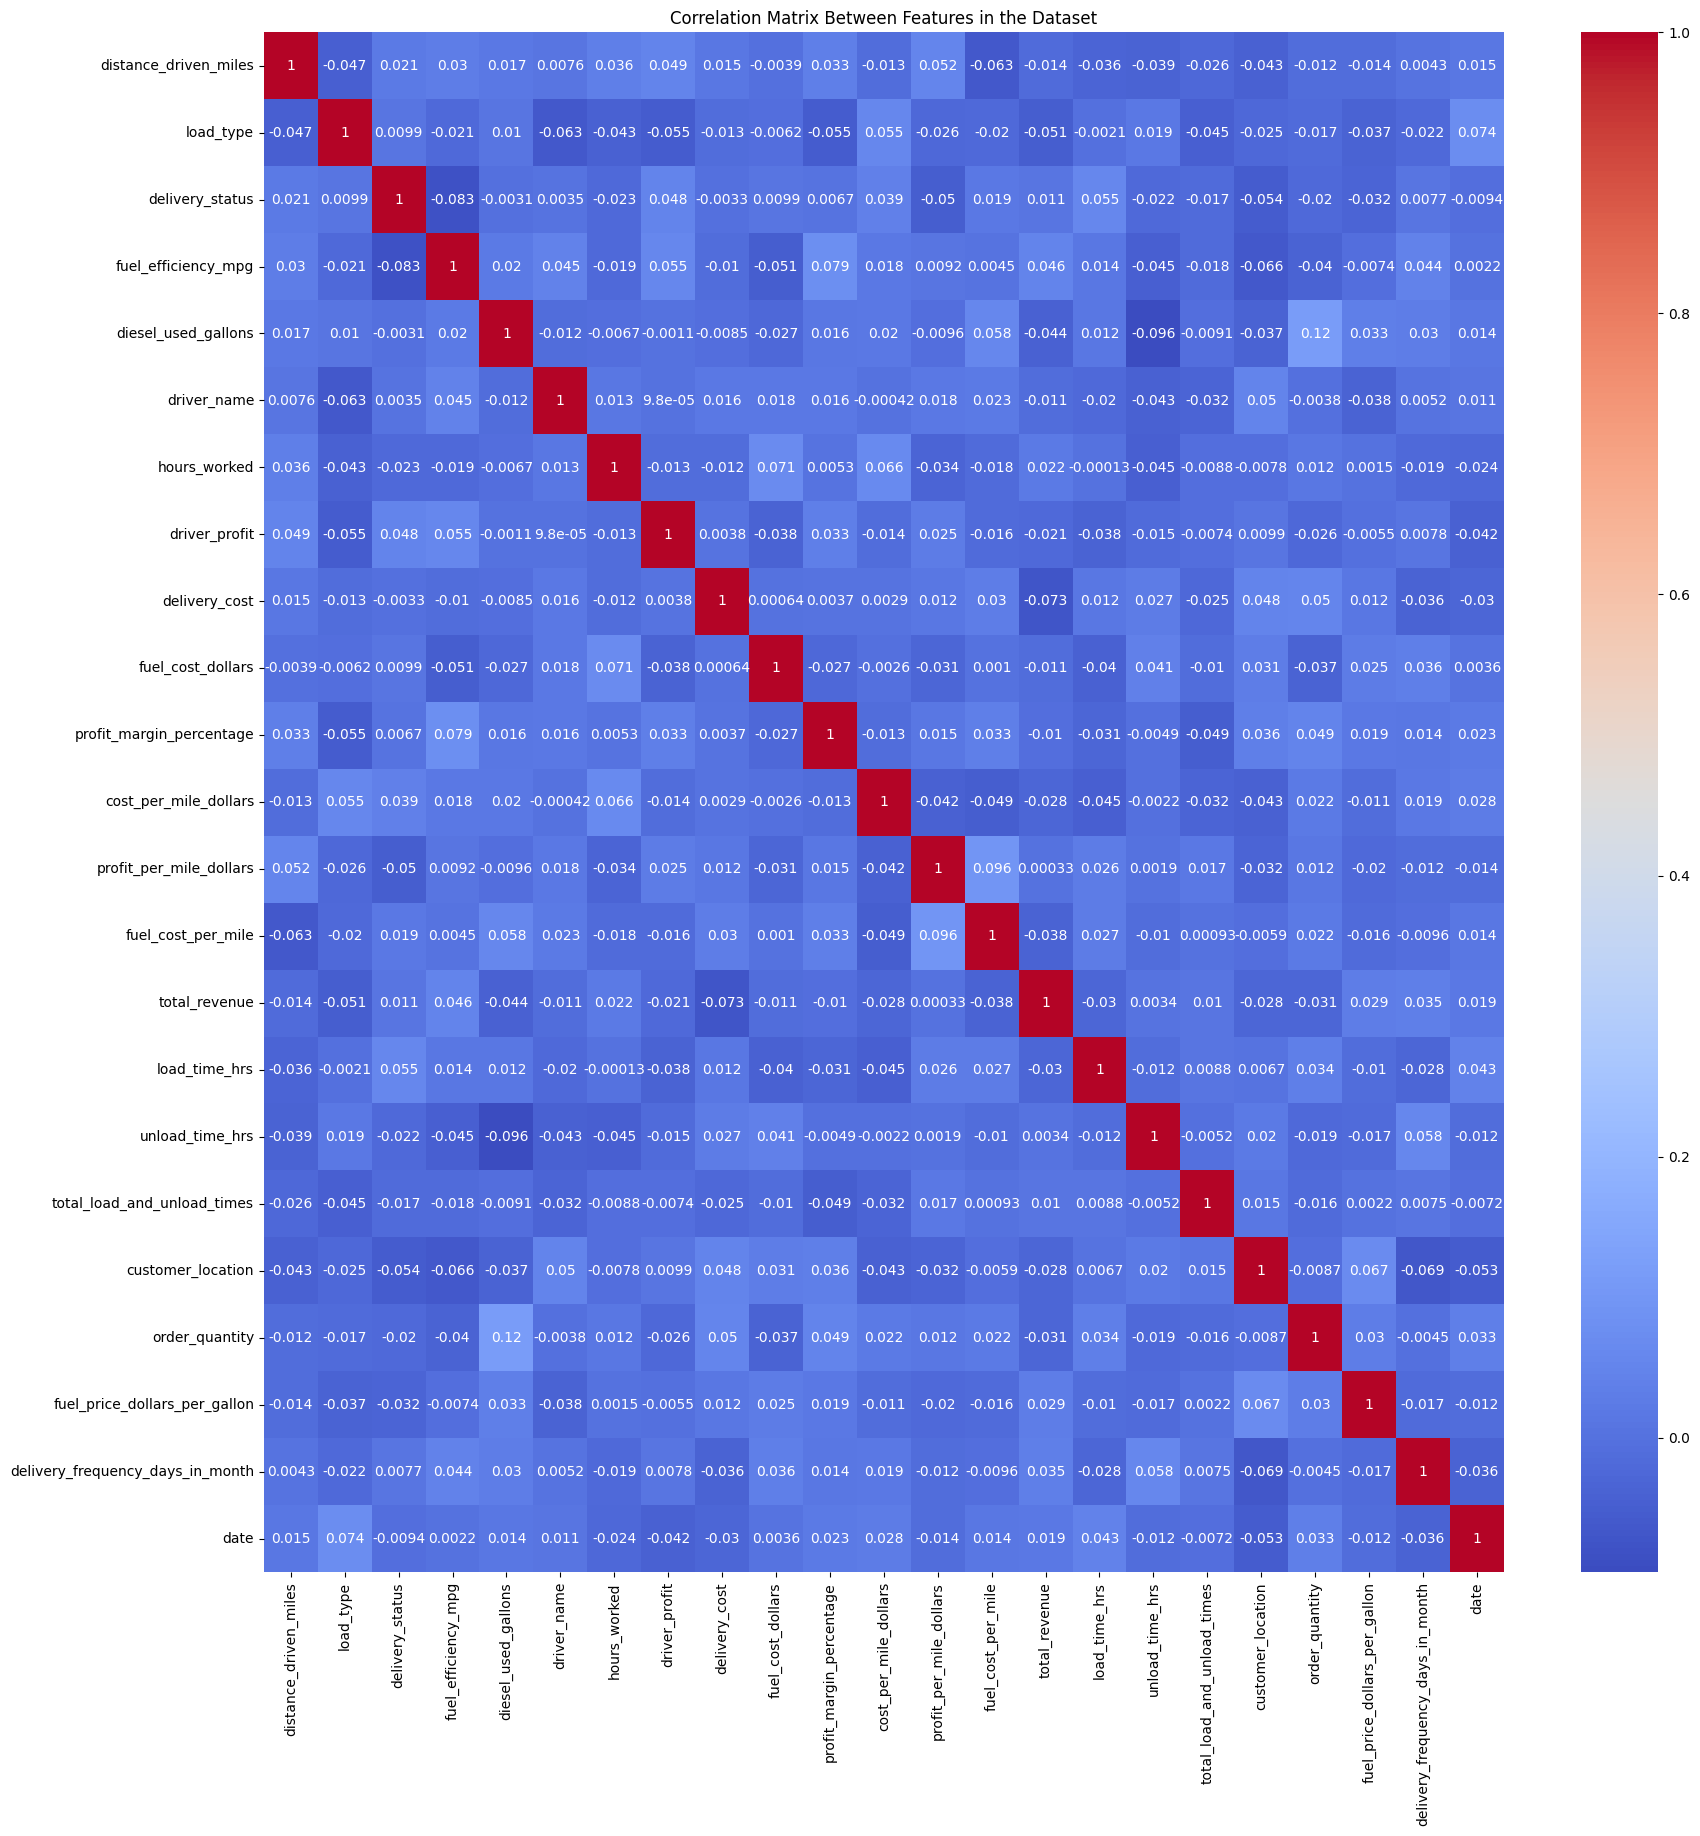

In [17]:
plt.figure(figsize=(20, 20))
fig = sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix Between Features in the Dataset")
plt.show()

By looking at the correlation matrix from this dataset, you can see that the features that influence each other are the fuel cost and the profit per mile, which could mean that as the fuel cost increases, the profit per mile increases or decreases. Also, The diesel used and order quantity features are correlated, meaning that the higher quatity ordered, the more diesel consumption. And lastly, Customer location and fuel price, meaning that different locations influence the fuel price of that location.

In [18]:
data = data.set_index('date')

## Analysis by beginning of first two Quarters (January vs April)

## Analysis January

In [19]:
january_date = data[data.index.month == 1]
january_date.head()

,distance_driven_miles,load_type,delivery_status,fuel_efficiency_mpg,diesel_used_gallons,driver_name,hours_worked,driver_profit,delivery_cost,fuel_cost_dollars,...,profit_per_mile_dollars,fuel_cost_per_mile,total_revenue,load_time_hrs,unload_time_hrs,total_load_and_unload_times,customer_location,order_quantity,fuel_price_dollars_per_gallon,delivery_frequency_days_in_month
date,,,,,,,,,,,,,,,,,,,,,
2023-01-01,152,1,0,6.57,210,3,14,1287,4172,1267.36,...,0.64,1.57,8189,2.91,2.64,3.33,0,5509,4.14,17
2023-01-01,485,0,1,7.09,168,3,7,1009,2381,1148.82,...,2.18,1.87,6386,2.60,2.38,3.35,4,2082,3.80,16
2023-01-01,398,0,0,7.39,198,3,9,1573,4796,1215.18,...,2.61,1.02,7942,2.34,2.33,2.79,3,9424,4.96,20
2023-01-02,320,1,0,6.38,258,1,9,1124,1021,310.79,...,1.50,1.39,9759,2.08,2.05,5.44,1,8376,4.02,22
2023-01-02,156,2,0,7.53,199,3,7,693,2387,339.74,...,1.81,1.85,1244,2.58,1.19,2.59,0,2927,4.10,6


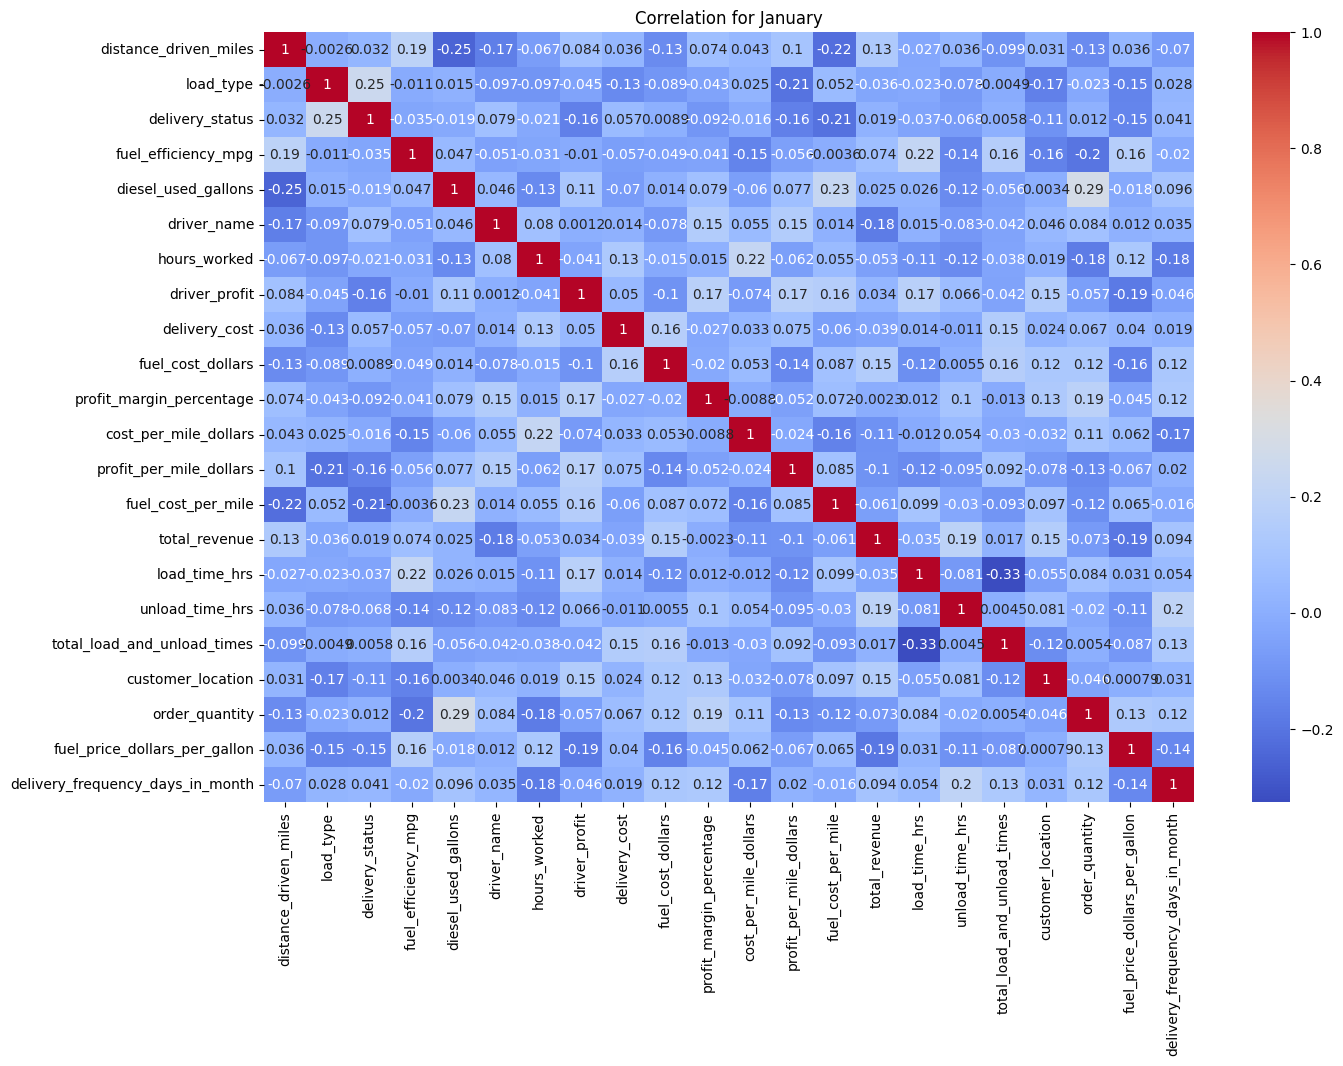

In [20]:
correlation_january = january_date.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation for January")
sns.heatmap(correlation_january, annot=True, cmap='coolwarm')
plt.show()

For the month of January, It doesnt look like there is any strong positive correlation between any of the features in the dataset. The squares in Red are the columns with a strong positive correlation, and the squares in blue being that they have a negative correlation

## Pairplots of the Features in the Dataset

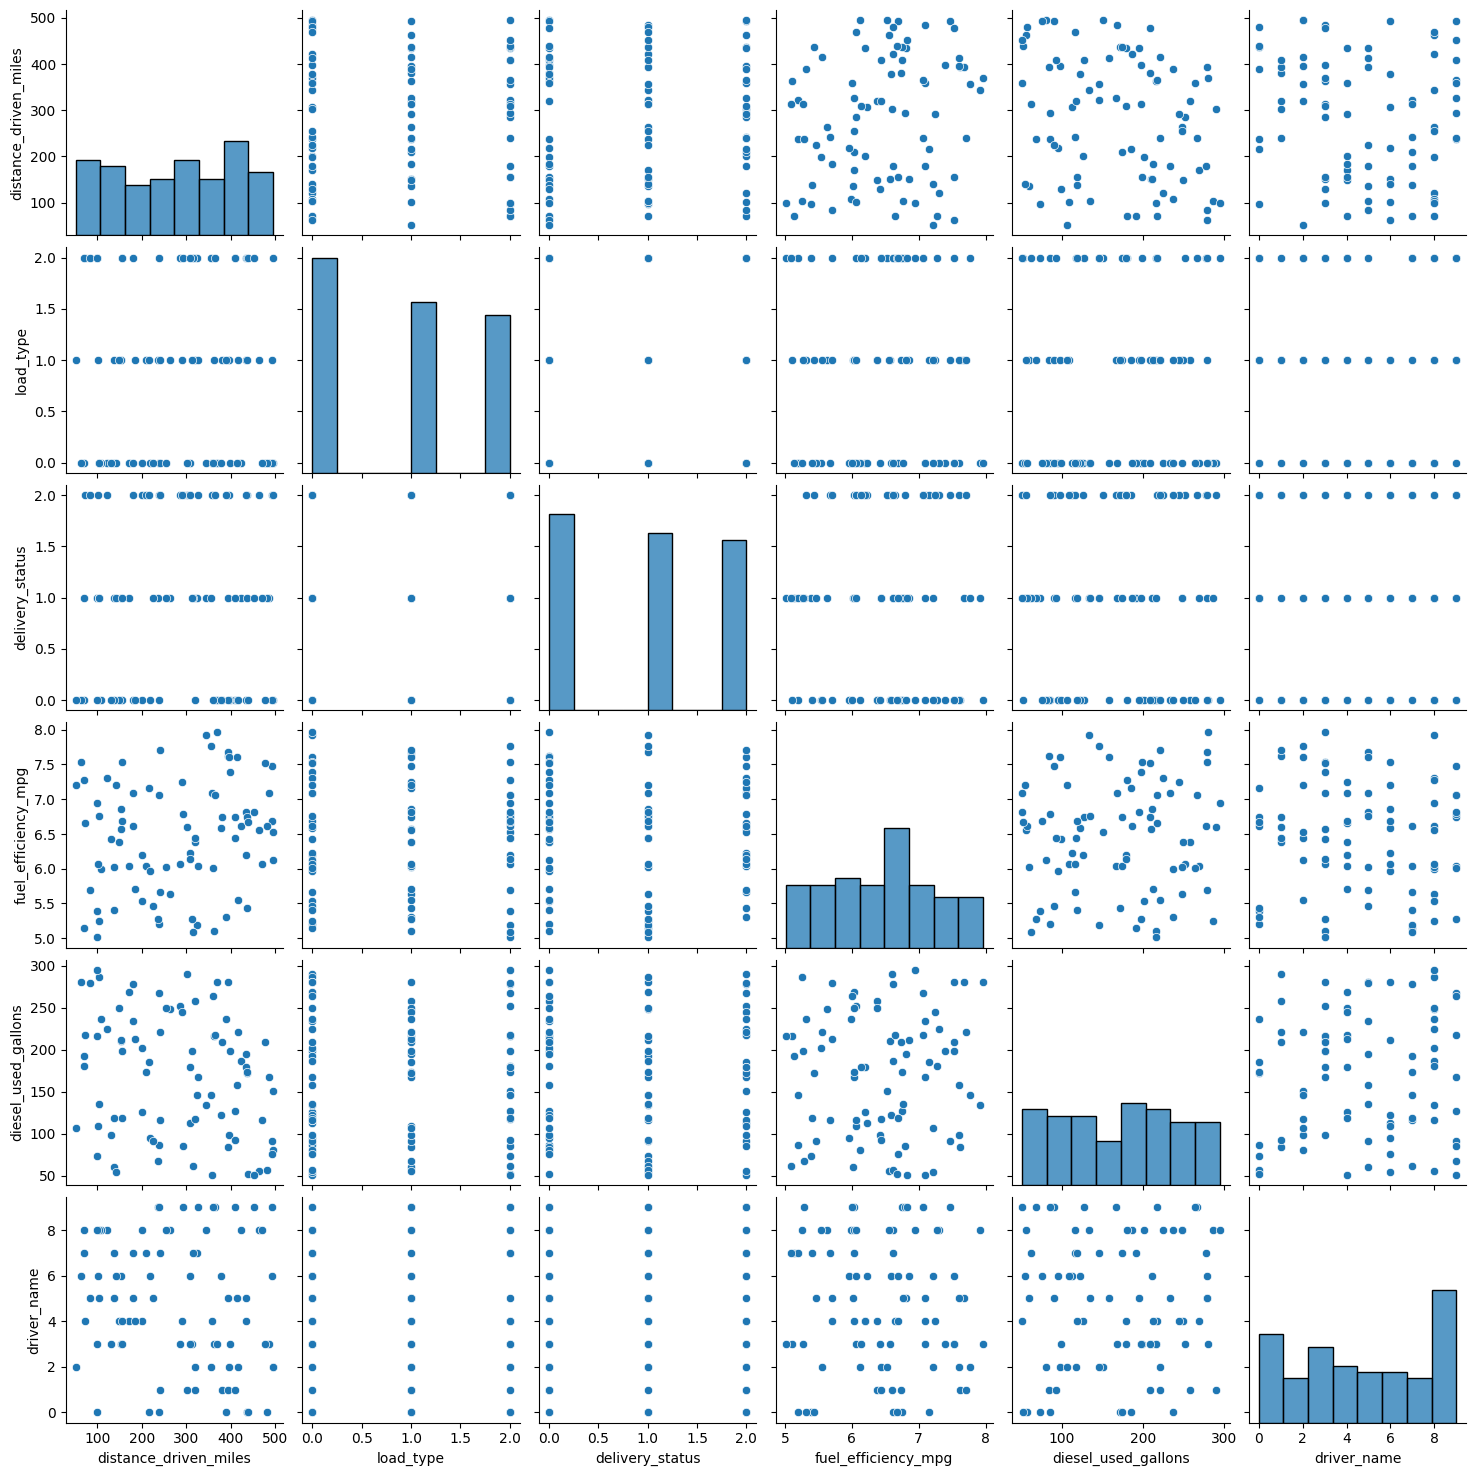

In [21]:
numerical_columns_january = ['distance_driven_miles', 'load_type', 'delivery_status',
       'fuel_efficiency_mpg', 'diesel_used_gallons', 'driver_name',
       ]
sns.pairplot(january_date[numerical_columns_january])
plt.show()

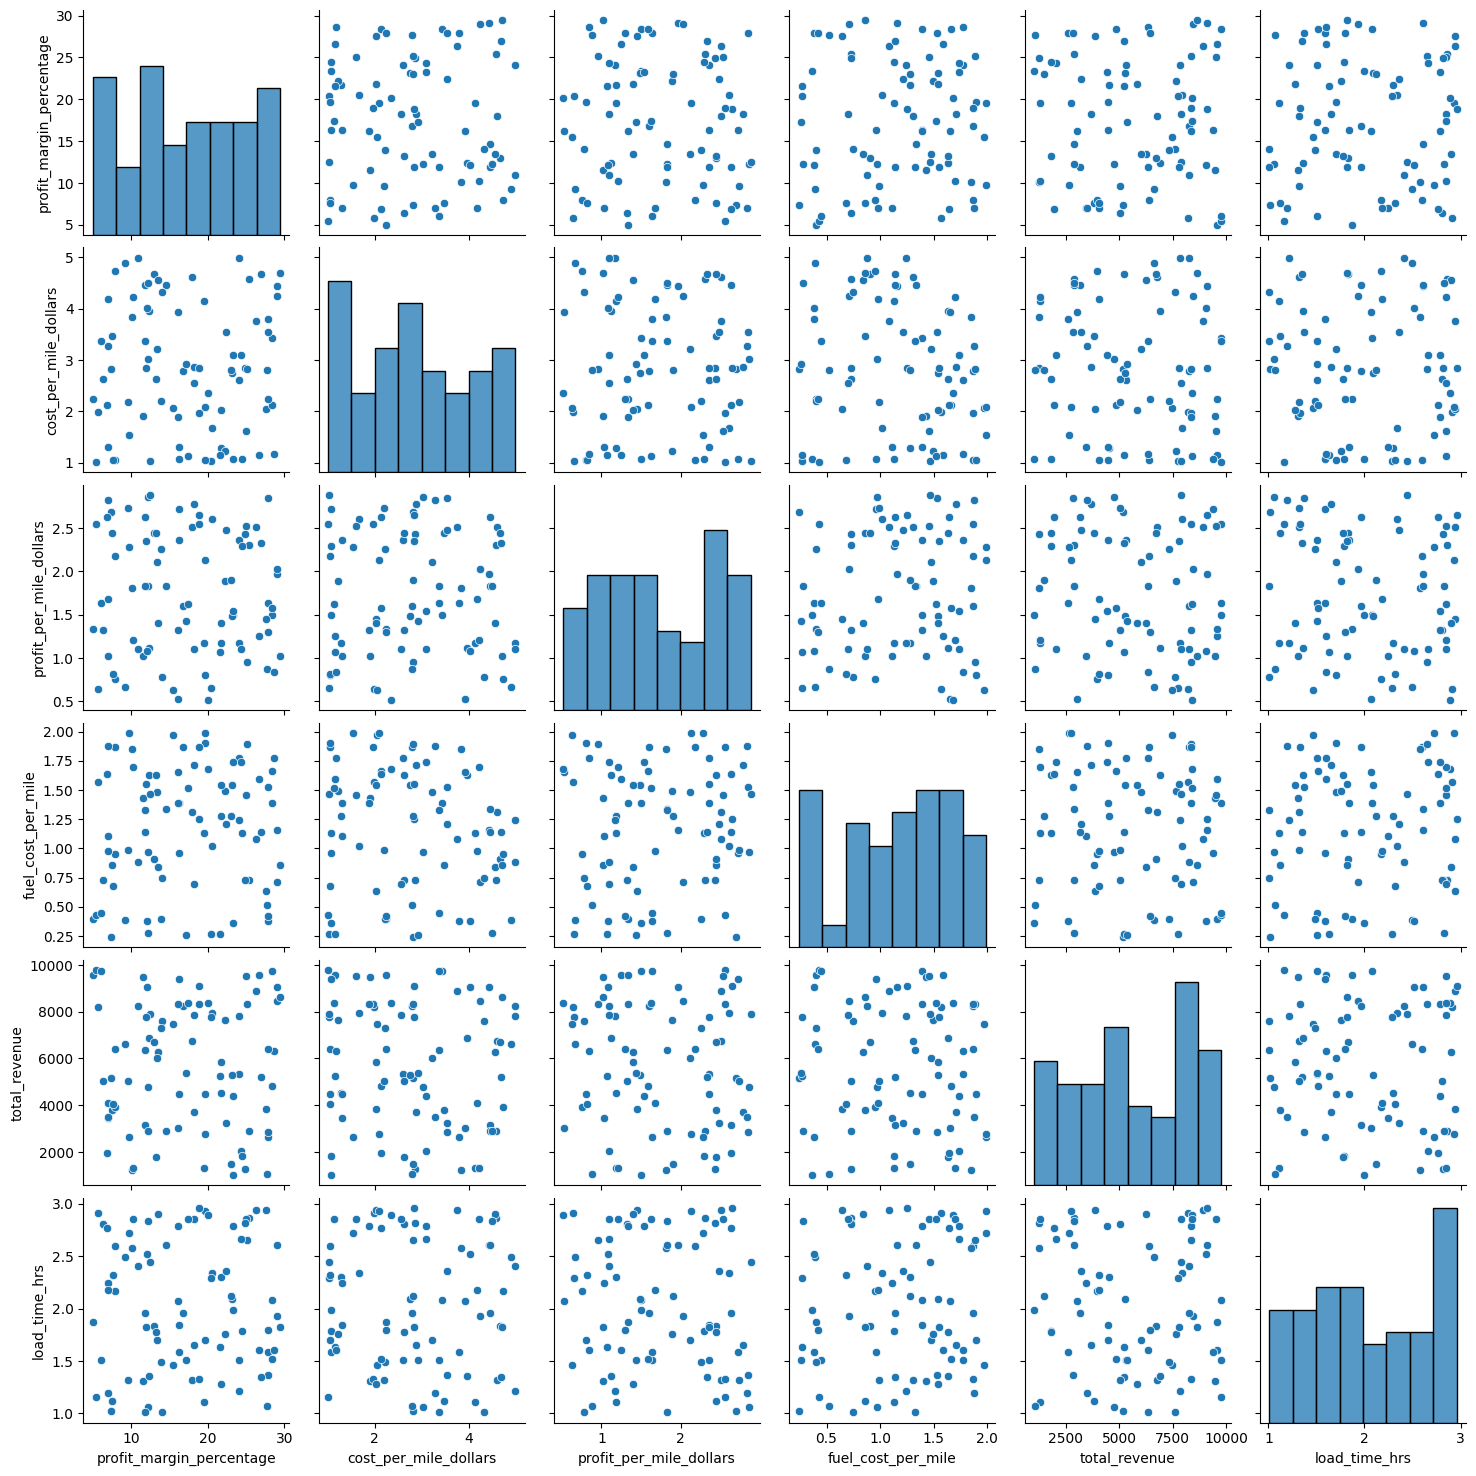

In [22]:
numerical_columns_january = ['profit_margin_percentage', 'cost_per_mile_dollars',
       'profit_per_mile_dollars', 'fuel_cost_per_mile', 'total_revenue',
       'load_time_hrs',
       ]
sns.pairplot(january_date[numerical_columns_january])
plt.show()


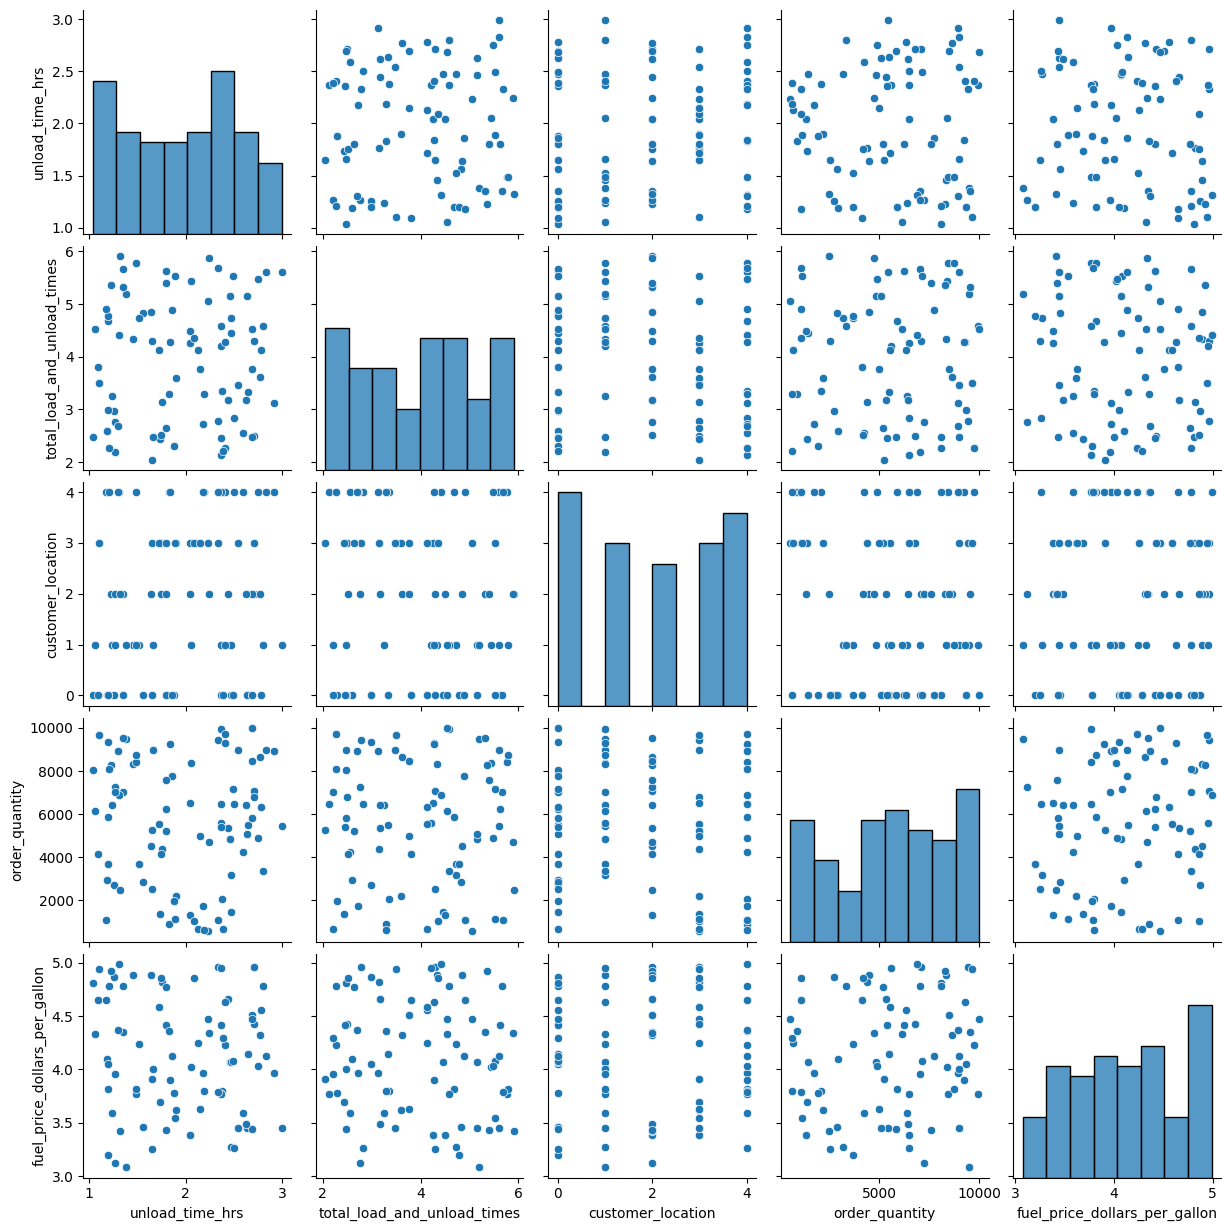

In [23]:
numerical_columns_january = ['unload_time_hrs', 'total_load_and_unload_times',
       'customer_location', 'order_quantity', 'fuel_price_dollars_per_gallon'
       ]
sns.pairplot(january_date[numerical_columns_january])
plt.show()



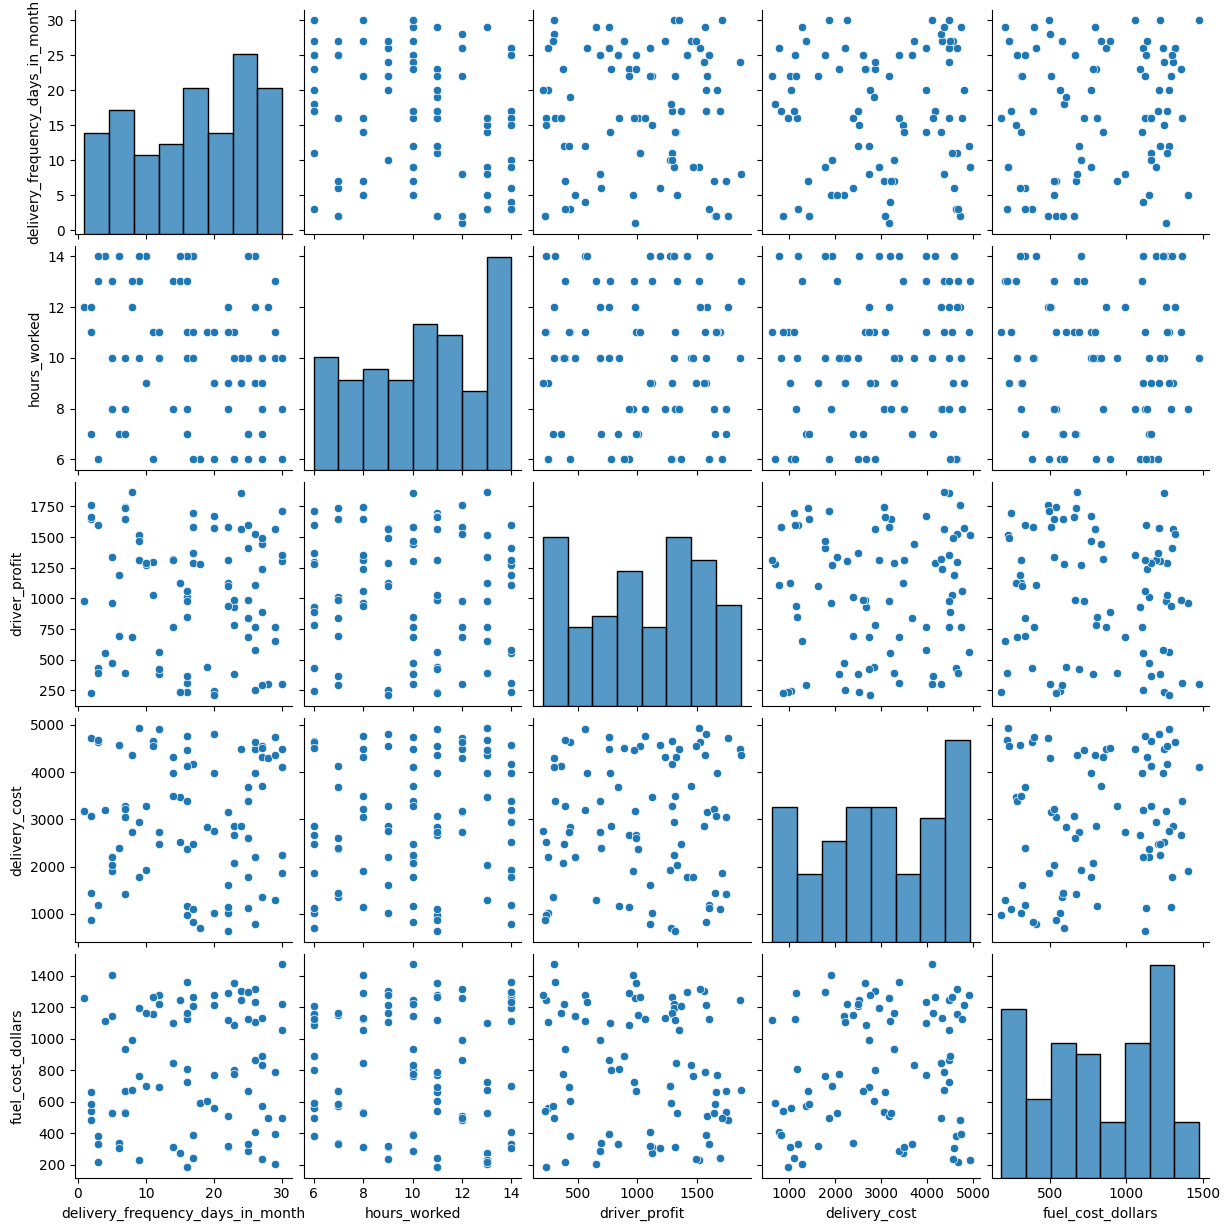

In [24]:
numerical_columns_january = ['delivery_frequency_days_in_month', 'hours_worked', 
                             'driver_profit', 'delivery_cost', 'fuel_cost_dollars'
       ]
sns.pairplot(january_date[numerical_columns_january])
plt.show()

By creating a heatmap and a pairplot of all the features in the dataset, you can observe that there is no correlation between any of the features in the dataset.

### Analyzing January by Driver

#### Diesel MPG by Driver

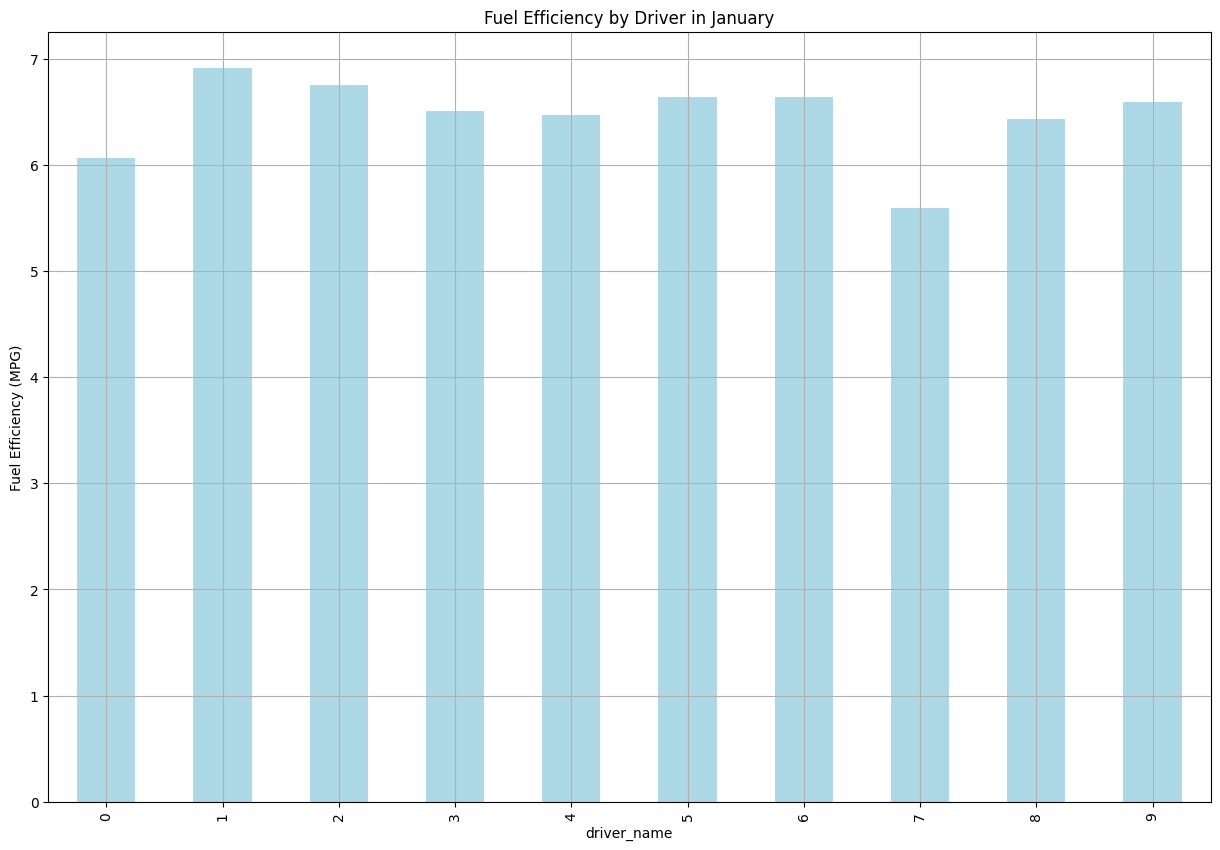

In [25]:
plt.figure(figsize=(15, 10))
fuel_efficiency = january_date.groupby('driver_name')['fuel_efficiency_mpg'].mean().round(2).plot(
    kind='bar',
    color='lightblue'
)
plt.grid()
plt.ylabel("Fuel Efficiency (MPG)")
plt.title("Fuel Efficiency by Driver in January")
plt.show()


According to the data, you can observe that the driver with the best fuel efficiency evaluating by miles per gallon, driver 1 is the driver with the best fuel efficiency when driving.

#### Load and Unload Times by Driver

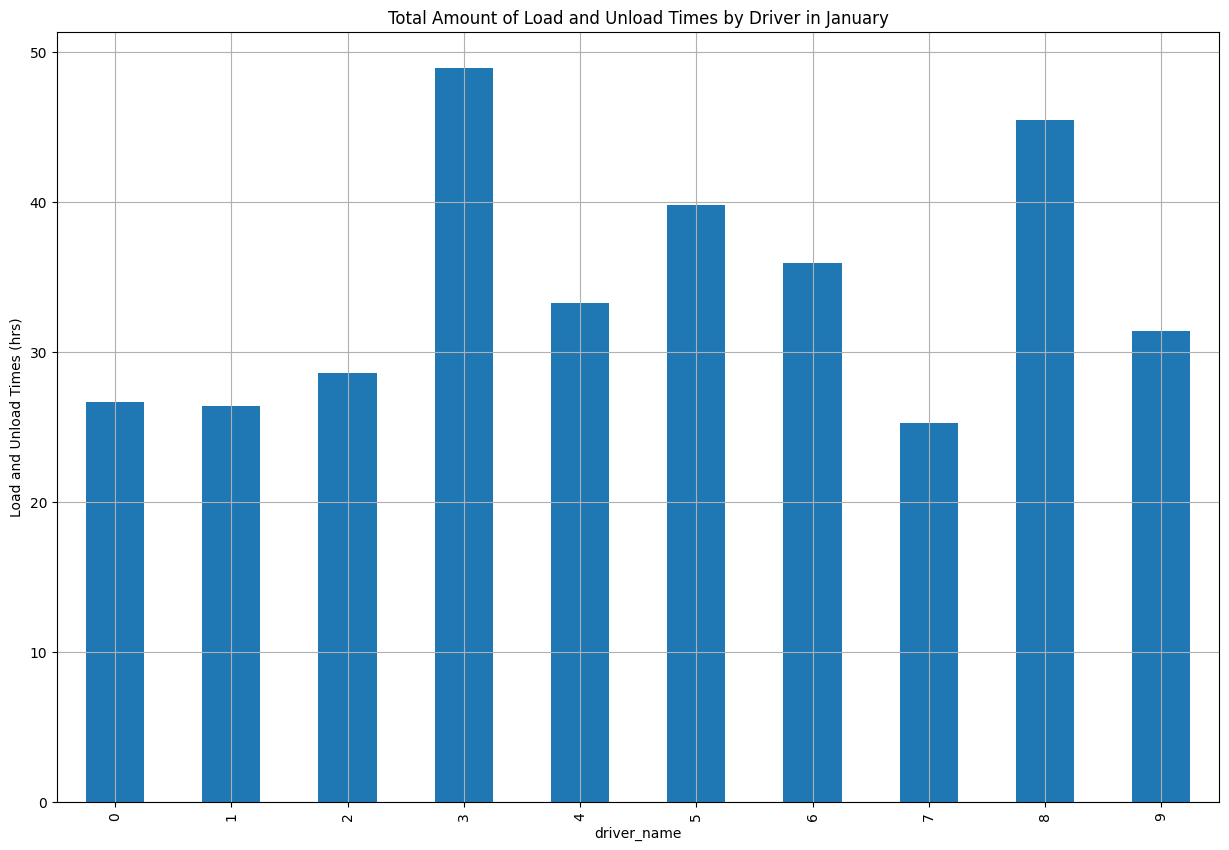

In [26]:
load_unload_times_january = january_date.groupby('driver_name')['total_load_and_unload_times'].sum(())
plt.figure(figsize=(15, 10))
load_unload_times_january.plot(
    kind='bar'
)
plt.ylabel("Load and Unload Times (hrs)")
plt.title("Total Amount of Load and Unload Times by Driver in January")
plt.grid()
plt.show()

From the bar graph, you can see that driver 3 and driver 8 have the highest combined load and unload times. Also, driver 0, 1, and 7 have the lowest combined load and unload times in the month of January.

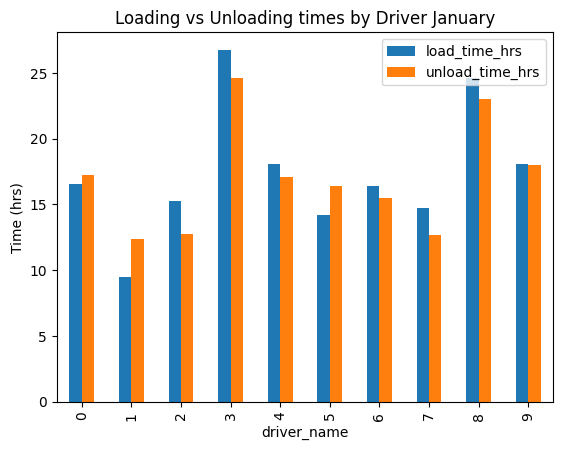

In [27]:
loading_times_january = january_date.groupby('driver_name')[['load_time_hrs', 'unload_time_hrs']].sum()
loading_times_january.plot(
    kind='bar'
)
plt.title("Loading vs Unloading times by Driver January")
plt.ylabel("Time (hrs)")
plt.show()

According to the bar graph comparing the load and unload times, you can see that all the drivers have similar load and unload times in the month of January.

#### Profit by Driver in January

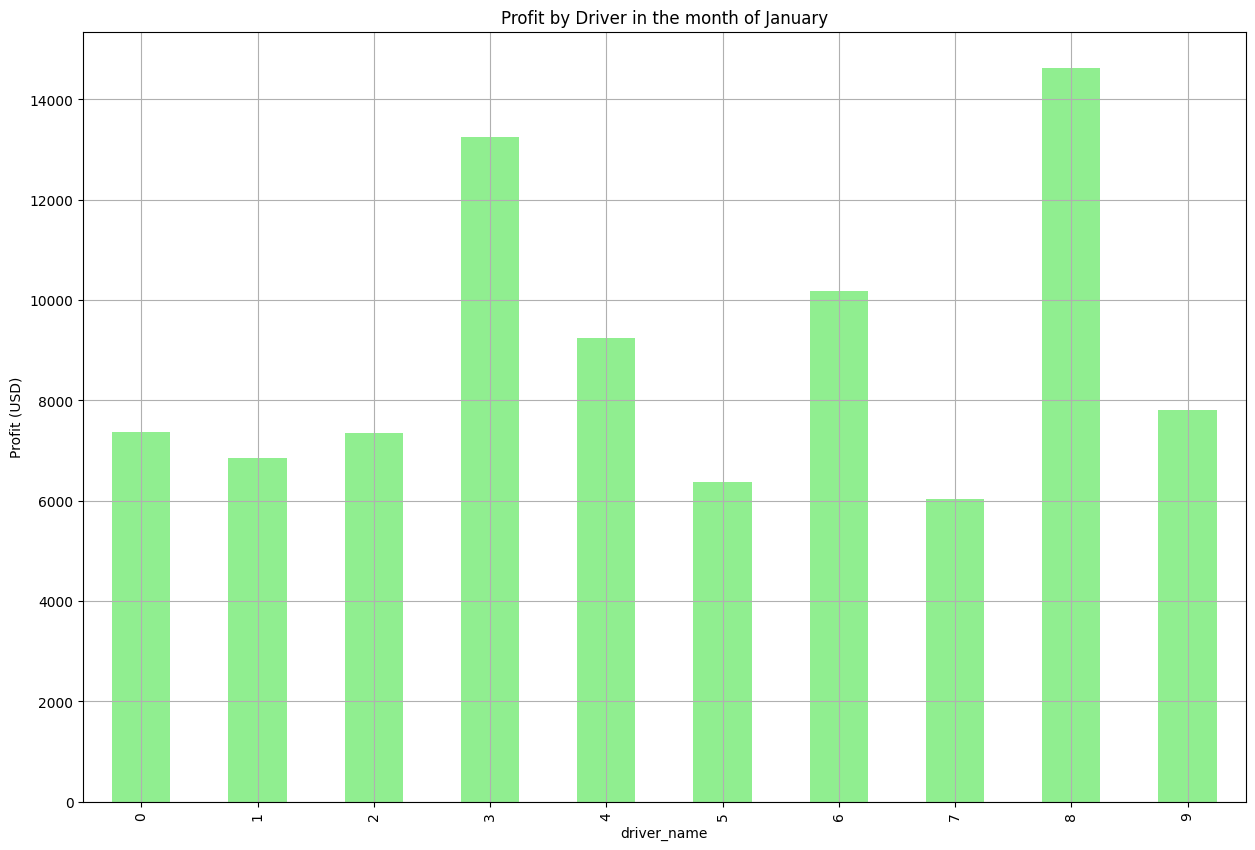

In [28]:
plt.figure(figsize=(15, 10))
driver_profit_january = january_date.groupby('driver_name')['driver_profit'].sum()
driver_profit_january.plot(
    kind='bar',
    color='lightgreen'
)
plt.title("Profit by Driver in the month of January")
plt.ylabel("Profit (USD)")
plt.grid()
plt.show()

Although driver 3 and 8 have the highest load and unload times, you can also see by the bar graph that they are the most profitable drives in the month of January.

### Hours worked and profit margin percentage

In [29]:
hours_worked_profit_percentage_january = january_date.groupby('driver_name')[['hours_worked', 'profit_margin_percentage']].sum()

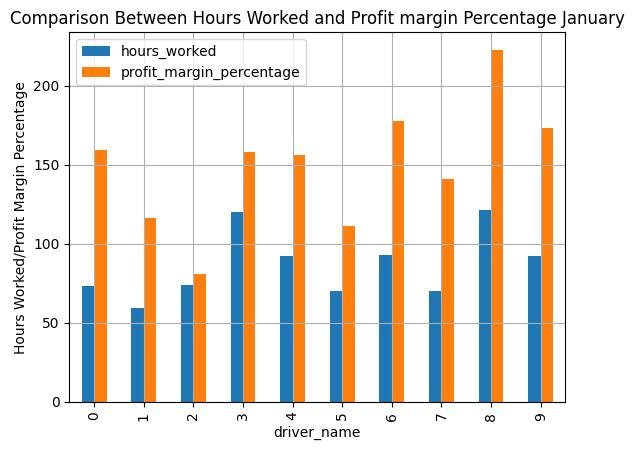

In [30]:

hours_worked_profit_percentage_january.plot(
    kind='bar'
)

plt.ylabel("Hours Worked/Profit Margin Percentage")
plt.grid()
plt.title("Comparison Between Hours Worked and Profit margin Percentage January")
plt.show()

According to the data, driver 8 has the highest profit margin percentage and also the highest of hours worked. On the contrary, driver 3 has just as much hours worked but his profit margin percentage isnt as high.

#### Delivery Status in January

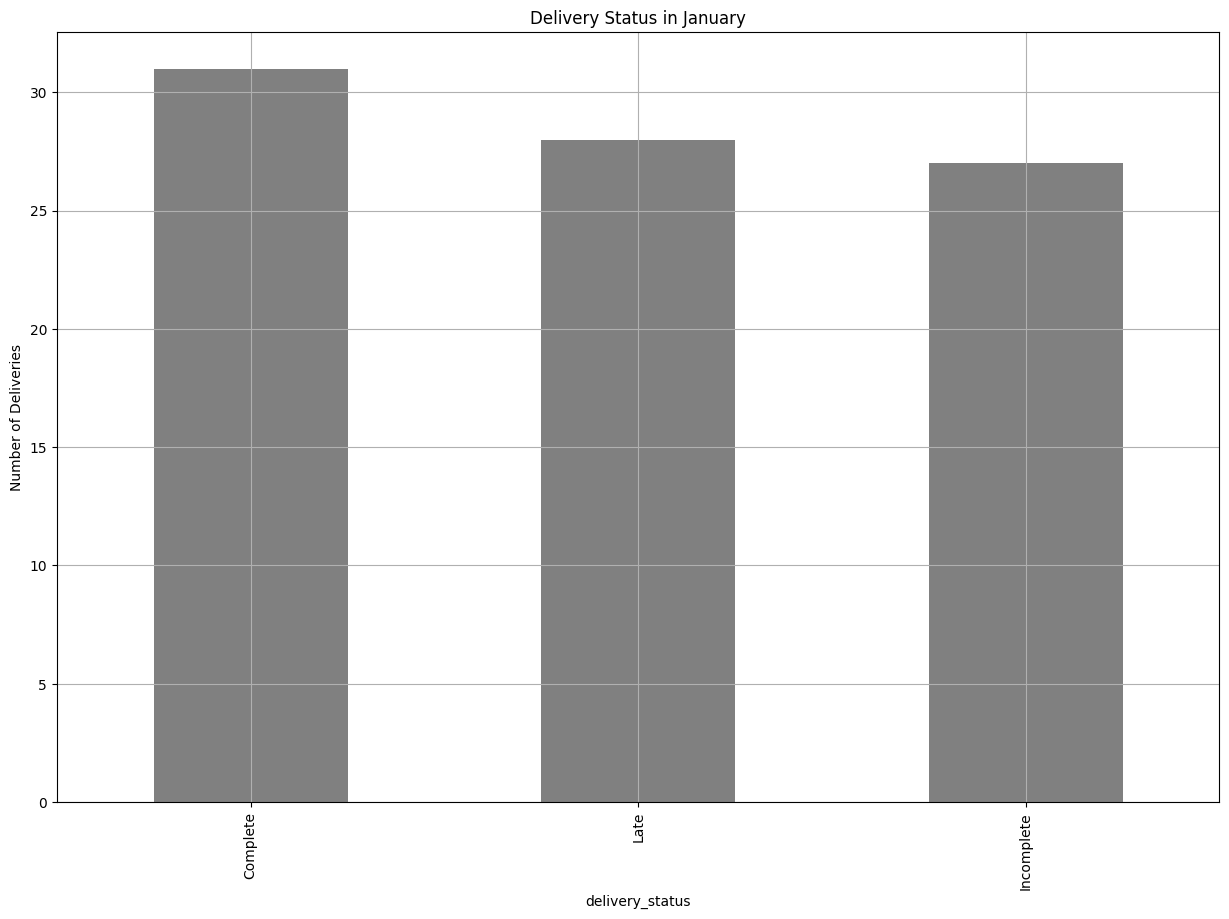

In [31]:
plt.figure(figsize=(15, 10))
ax = january_date['delivery_status'].value_counts().plot(
    kind='bar',
    color='gray'
)
ax.set_xticklabels(['Complete', 'Late', 'Incomplete'])
plt.ylabel("Number of Deliveries")
plt.title("Delivery Status in January")
plt.grid()
plt.show()


By looking at the countplot above, you can see that the number of completed deliveries is larger than the incomplete and late deliveries. Although it is larger, it is concerning that the number of incomplete and late deliveries is almost as much as the completed deliveries.

### Revenue for January

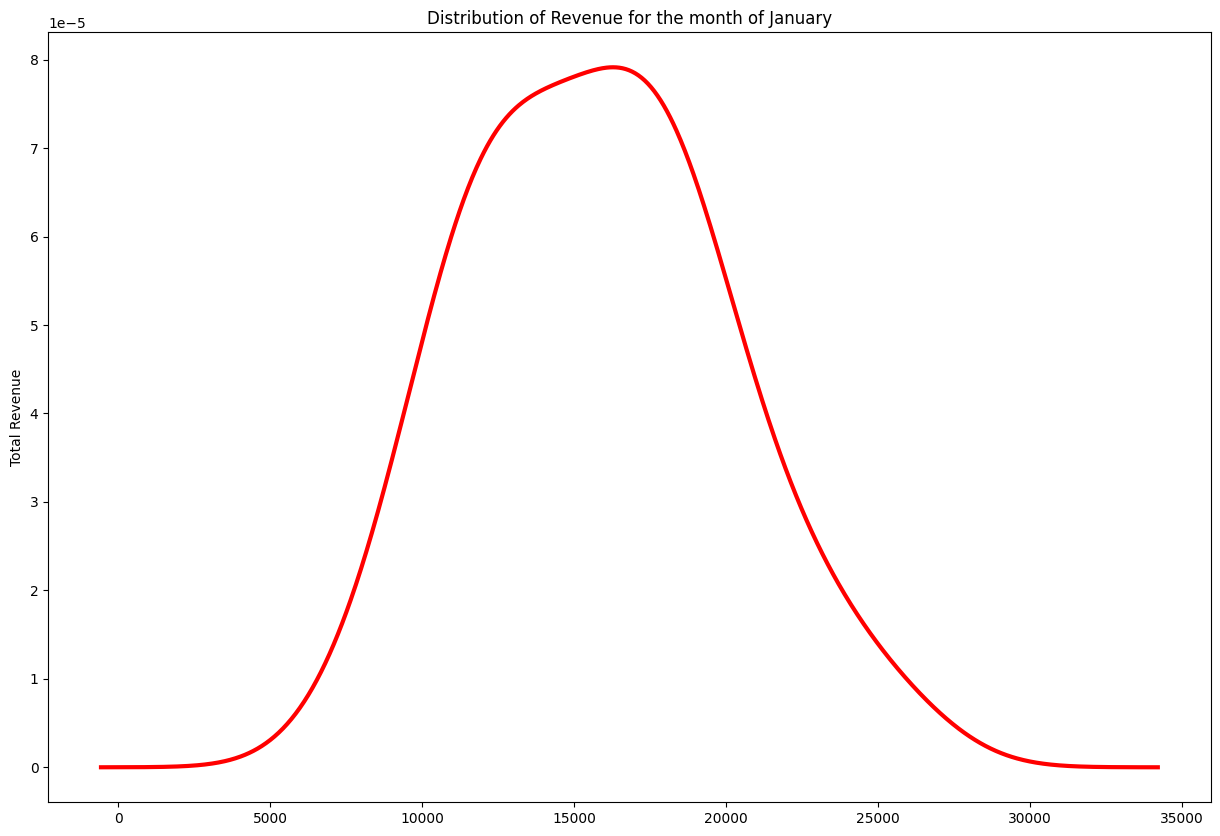

In [32]:
plt.figure(figsize=(15, 10))
january_date.groupby('date')['total_revenue'].sum().plot(
    linewidth=3,
    kind='density',
    color='red'
)
plt.ylabel("Total Revenue")
plt.title("Distribution of Revenue for the month of January")
plt.show()

By analyzing the density plot, you can see that for the month of January, the average total revenue in a day for the month of January, being around 15,000 USD. The lowest revenue in a day is around 8000 USD and max is around 25,000 USD.

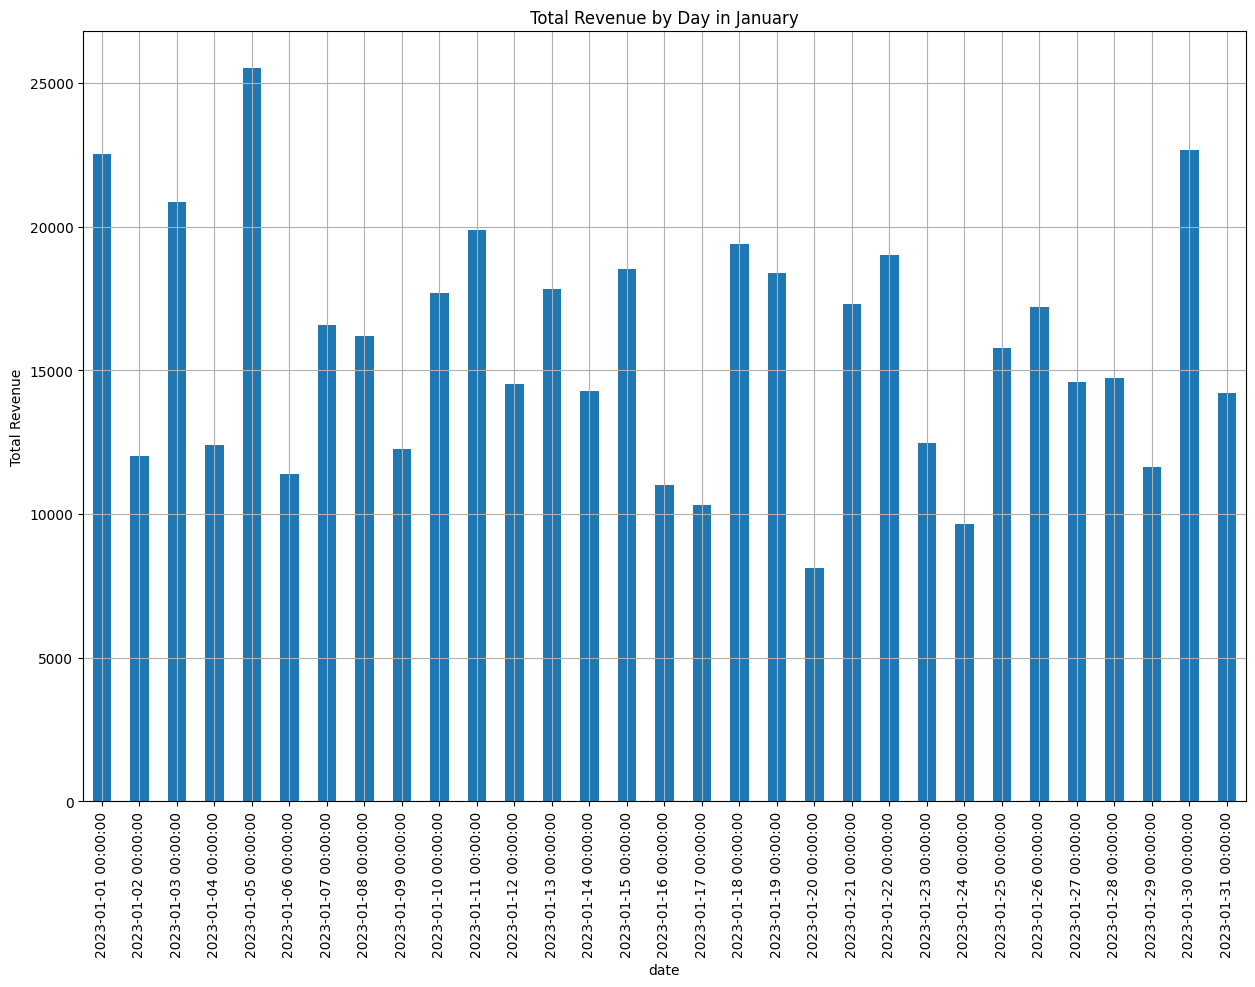

In [33]:
plt.figure(figsize=(15, 10))
january_date.groupby('date')['total_revenue'].sum().plot(
    kind='bar'
)
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Day in January")
plt.grid()
plt.show()

After creating a bar graph for the January data, you can see that the lowest day for total revenue was on the 20th of January and the highest day was on January 5th.

,total_revenue,hours_worked,revenue_per_hour
driver_name,,,
1,47520,59,805.42
5,51592,70,737.03
0,45736,73,626.52
4,55934,92,607.98
3,66639,120,555.33
7,38757,70,553.67
2,38368,74,518.49
9,45815,92,497.99
8,55891,121,461.91


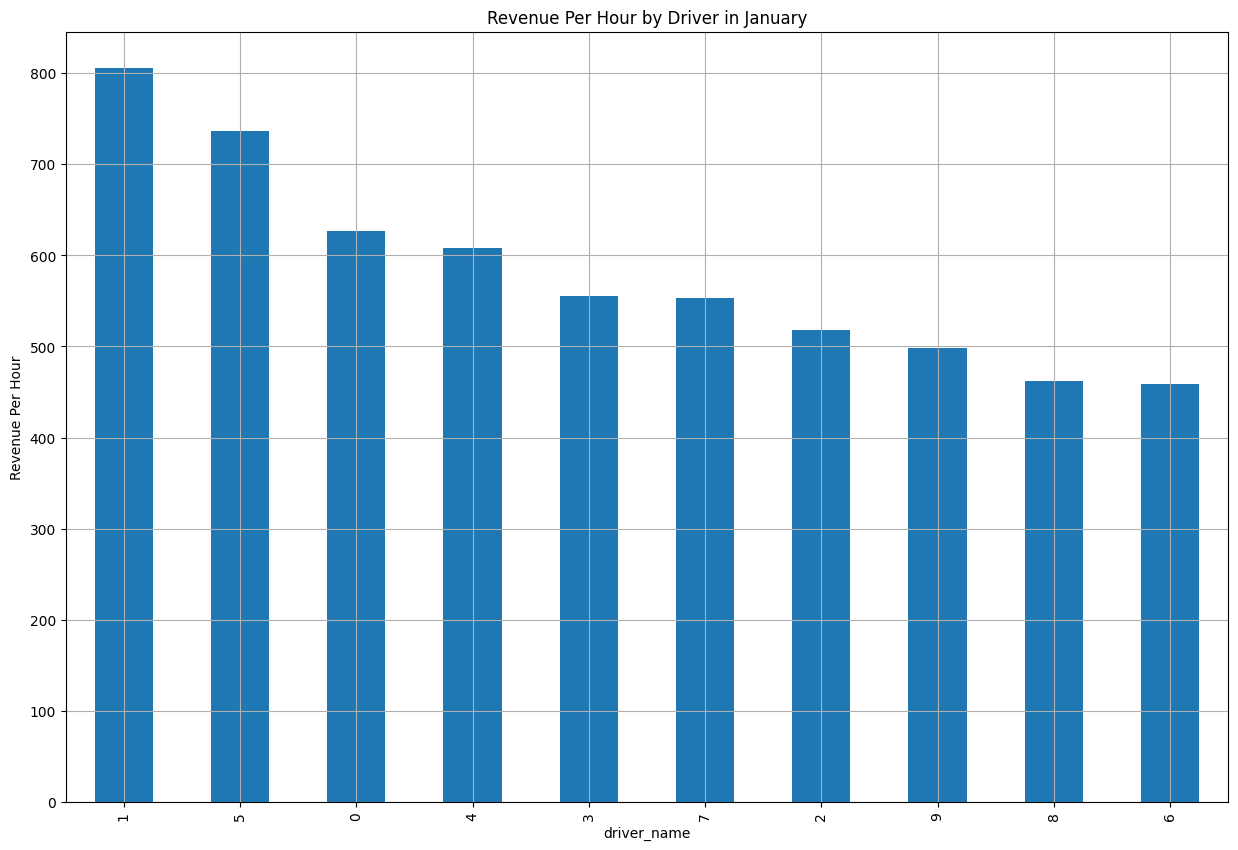

In [34]:
revenue_hours_worked = january_date.groupby('driver_name')[[ 'total_revenue', 'hours_worked']].sum()
revenue_hours_worked['revenue_per_hour'] = (revenue_hours_worked['total_revenue'] /  revenue_hours_worked['hours_worked']).round(2)
revenue_hours_worked = revenue_hours_worked.sort_values(by='revenue_per_hour', ascending=False)
display(revenue_hours_worked)

plt.figure(figsize=(15, 10))
revenue_hours_worked['revenue_per_hour'].plot(
    kind='bar'
)
plt.ylabel("Revenue Per Hour")
plt.title("Revenue Per Hour by Driver in January")
plt.grid()
plt.show()

By calculating the revenue per hour by driver, you can see that the driver that is most productive in the hours worked in driver 1, and the least productive is driver 6.

In [35]:
display(revenue_hours_worked[revenue_hours_worked.index == 1])
display(revenue_hours_worked[revenue_hours_worked.index == 6])

,total_revenue,hours_worked,revenue_per_hour
driver_name,,,
1,47520,59,805.42


,total_revenue,hours_worked,revenue_per_hour
driver_name,,,
6,42691,93,459.04


By comparing the most productive driver to the least productive driver in the company, you can see that driver 6 worked almost twice as many hours as driver 1 and made least in total revenue for the company.

### Comparing January 5th vs January 20th

In [36]:
january_fifth = january_date[january_date.index.day == 5]
january_fifth

,distance_driven_miles,load_type,delivery_status,fuel_efficiency_mpg,diesel_used_gallons,driver_name,hours_worked,driver_profit,delivery_cost,fuel_cost_dollars,...,profit_per_mile_dollars,fuel_cost_per_mile,total_revenue,load_time_hrs,unload_time_hrs,total_load_and_unload_times,customer_location,order_quantity,fuel_price_dollars_per_gallon,delivery_frequency_days_in_month
date,,,,,,,,,,,,,,,,,,,,,
2023-01-05,380,1,0,6.74,209,1,10,475,2194,1147.30,...,1.12,1.63,6882,1.36,1.83,3.30,4,902,4.36,5
2023-01-05,137,1,1,6.02,60,5,6,249,1026,563.46,...,1.34,0.40,9552,1.87,2.71,4.30,2,7067,4.96,20
2023-01-05,422,0,1,6.61,187,8,12,1581,3160,507.86,...,1.97,1.16,9076,2.61,2.44,3.17,2,5365,4.66,22


In [37]:
january_fifth['delivery_status'].value_counts()

delivery_status
1    2
0    1
Name: count, dtype: int64

In [38]:
january_twentieth = january_date[january_date.index.day == 20]
january_twentieth

,distance_driven_miles,load_type,delivery_status,fuel_efficiency_mpg,diesel_used_gallons,driver_name,hours_worked,driver_profit,delivery_cost,fuel_cost_dollars,...,profit_per_mile_dollars,fuel_cost_per_mile,total_revenue,load_time_hrs,unload_time_hrs,total_load_and_unload_times,customer_location,order_quantity,fuel_price_dollars_per_gallon,delivery_frequency_days_in_month
date,,,,,,,,,,,,,,,,,,,,,
2023-01-20,216,1,2,7.16,185,0,11,230,871,538.64,...,1.49,1.54,5278,2.09,1.04,2.48,0,8062,4.81,2
2023-01-20,323,2,1,5.19,146,7,6,1598,1115,1128.34,...,2.85,1.53,2844,1.37,1.24,3.25,1,6400,3.59,25


In [39]:
january_twentieth['delivery_status'].value_counts()

delivery_status
2    1
1    1
Name: count, dtype: int64

By filtering the data by these two dates, you can right away see that on the 8th, two of those deliveries were late and one was completed. On January 20th, you can observe that one of the deliveries was incomplete and one was late.

### Different Load Types in January

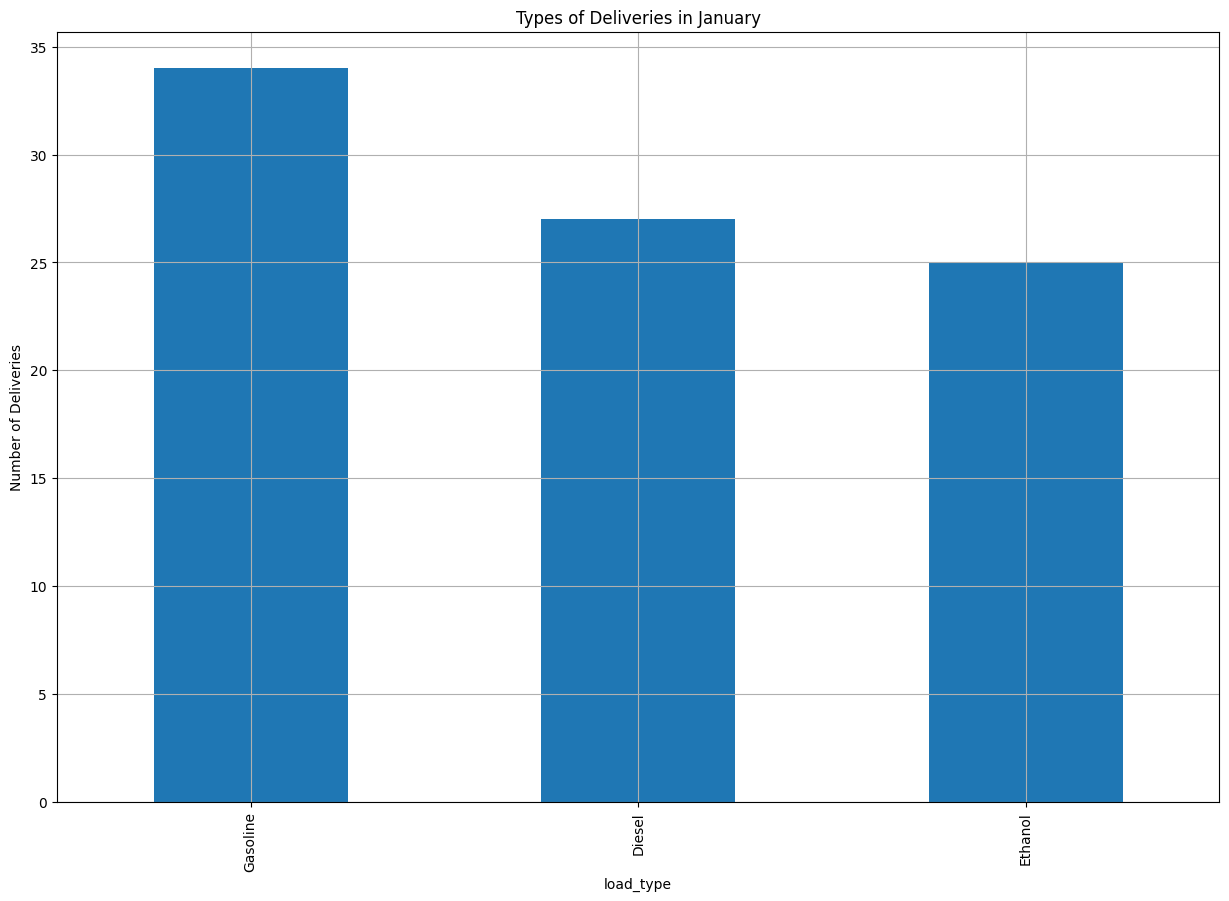

In [40]:
plt.figure(figsize=(15, 10))
ax = january_date['load_type'].value_counts().plot(
    kind='bar'
)
ax.set_xticklabels(['Gasoline', "Diesel", "Ethanol"])
plt.title("Types of Deliveries in January")
plt.ylabel("Number of Deliveries")
plt.grid()
plt.show()

In the month of January, the most types of product delivered was gasoline, followed by diesel, and last would be loads of ethanol.

### Delivery Sites in January

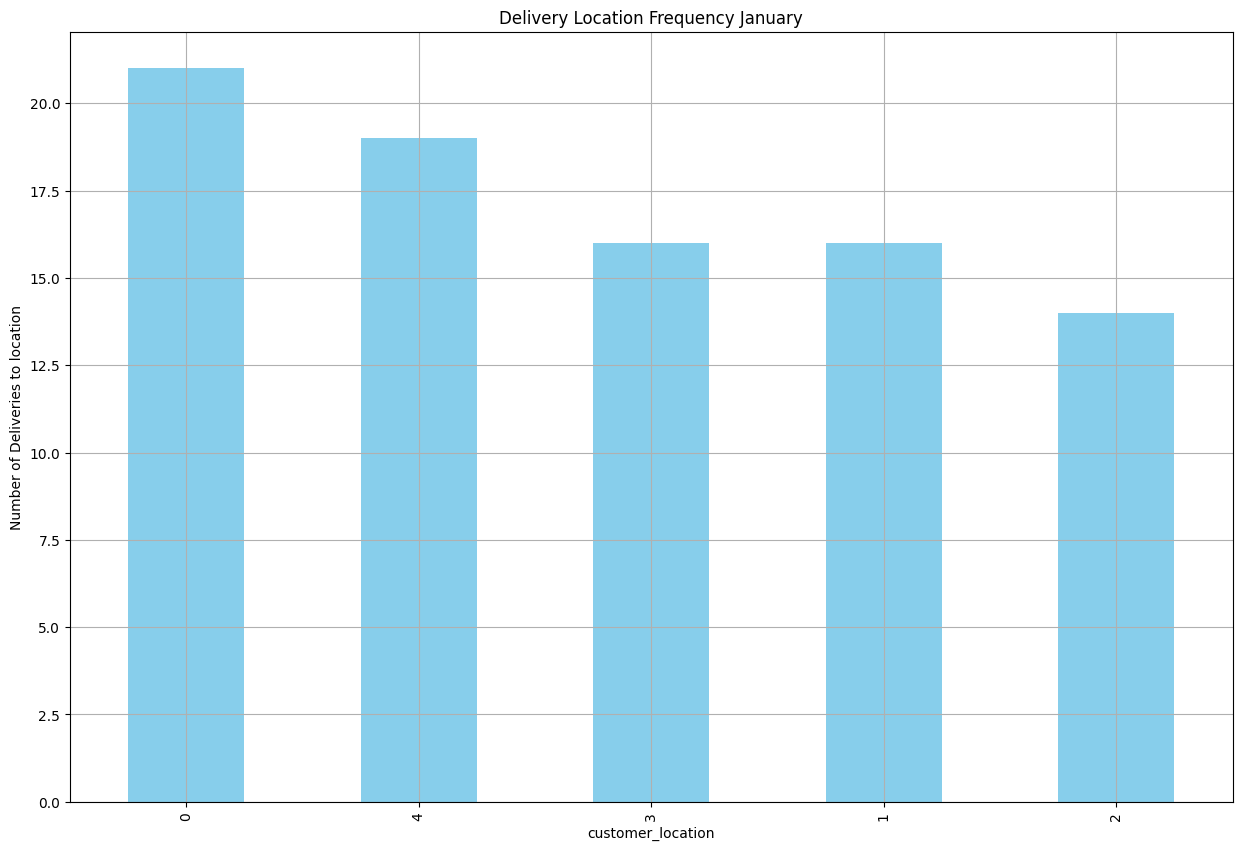

In [41]:
plt.figure(figsize=(15, 10))
customer_locations = january_date['customer_location'].value_counts()
customer_locations.plot(
    kind='bar',
    color='skyblue'
)
plt.ylabel("Number of Deliveries to location")
plt.title("Delivery Location Frequency January")
plt.grid()
plt.show()

By analyzing the Data, you can see that our most frequent customer for the month was customer 0 with over twenty deliveries.

### Analyzing Deliveries to Customer 0

In [42]:
customer_zero = january_date[january_date['customer_location'] == 0]
delivery_status_driver = customer_zero[['driver_name', 'delivery_status']]

delivery_status_driver.sort_values(by='delivery_status')


,driver_name,delivery_status
date,,
2023-01-01,3,0
2023-01-28,8,0
2023-01-21,7,0
2023-01-16,2,0
2023-01-13,8,0
2023-01-29,0,0
2023-01-09,5,0
2023-01-02,3,0
2023-01-13,5,1


By analyzing the data on the status of the deliveries to customer 0, you can see that we have a total of 8 successful deliveries, 4 late deliveries and 9 incomplete deliveries to this customer. This is very concerning because the success rate is low to this delivery site.

### Analyzing Deliveries to Customer 1

In [43]:
customer_zero = january_date[january_date['customer_location'] == 1]
delivery_status_driver = customer_zero[['driver_name', 'delivery_status']]

delivery_status_driver.sort_values(by='delivery_status')

,driver_name,delivery_status
date,,
2023-01-02,1,0
2023-01-08,1,0
2023-01-17,5,0
2023-01-29,2,0
2023-01-03,7,1
2023-01-03,6,1
2023-01-04,4,1
2023-01-13,0,1
2023-01-16,3,1


For customer 1, we have 11 completed deliveries, although 7 of those deliveries were considered late. We can also analyze that we have 5 deliveries that were incomplete, where you can see that 2 of those deliveries that were unsuccessful were being delivered by driver 4.

### Total Revenue Generated Customer 0 in January

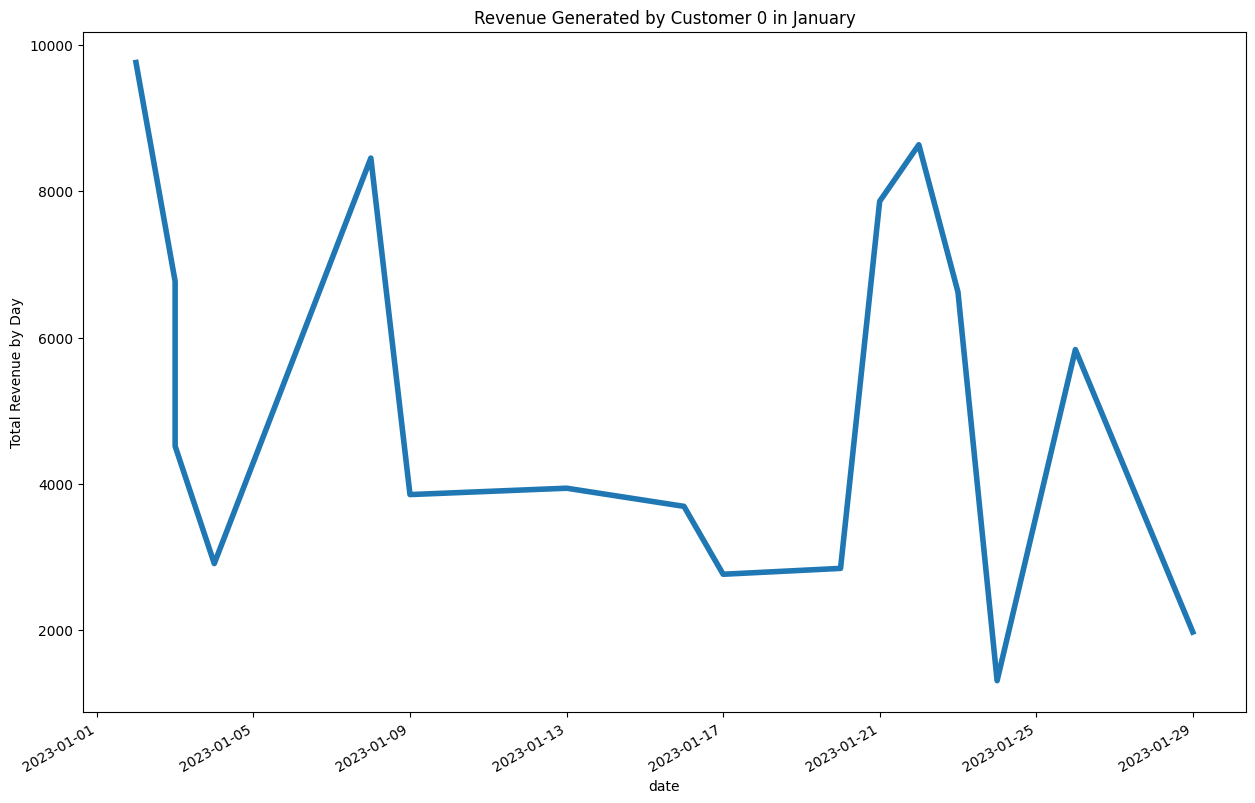

In [44]:
plt.figure(figsize=(15, 10))
customer_zero['total_revenue'].plot(
    linewidth=4
)
plt.title("Revenue Generated by Customer 0 in January")
plt.ylabel("Total Revenue by Day")
plt.show()

The line graph shows that Customer 0 initially had the highest revenue at the beginning of the month, nearing 10,000. However, there was a sharp decline in revenue, followed by a recovery. The middle of the month shows a period of steady but low revenue, before a significant spike, ultimately reaching another low point. Overall, the revenue for this customer fluctuates throughout the month.

## Conclusion of Exploratory Data Analysis for January

#### ****Summary of the Analysis for January:****

***1.Correlation Analysis:***

- A heatmap and pairplot were created to observe relationships between features. There was no strong positive correlation between any features in the dataset for the month of January.

- Red squares in the heatmap indicate strong positive correlations, while blue squares suggest negative correlations. However, no significant relationships were found.

***2.Driver Performance:***

- Fuel Efficiency: Driver 1 had the best fuel efficiency, evaluated by miles per gallon.

- Load and Unload Times: Drivers 3 and 8 had the highest combined load and unload times. However, drivers 0, 1, and 7 had the lowest combined times in January. Despite higher load/unload times, drivers 3 and 8 were the most profitable.

- Profit Margin and Hours Worked: Driver 8 had the highest profit margin and worked the most hours, while Driver 3 had comparable working hours but a lower profit margin.

***3.Delivery Status:***

- The countplot revealed that completed deliveries were more frequent than incomplete or late deliveries, though the number of incomplete and late deliveries was concerningly close to the number of completed ones.

***4.Revenue Analysis:***

- Average Total Revenue: The average total revenue per day in January was around $15,000, with a low of $8,000 and a high of $25,000.

- Revenue per Day: The lowest revenue day was January 20th, and the highest revenue day was January 5th.

- Revenue per Hour by Driver: Driver 1 was the most productive, generating the highest revenue per hour, while Driver 6 was the least productive, working almost twice as many hours but earning the least in total revenue.

***5.Delivery Trends:***

- On January 8th, two deliveries were late and one was completed. On January 20th, one delivery was incomplete, and one was late.

- Most Delivered Product Types: Gasoline was the most frequently delivered product, followed by diesel and ethanol.

***6.Customer Analysis:***

- Customer 0: The most frequent customer in January with over 20 deliveries. However, the delivery success rate was low, with 8 successful deliveries, 4 late deliveries, and 9 incomplete deliveries.

- Customer 1: Had 11 completed deliveries, though 7 were late, and 5 were incomplete. Driver 4 was responsible for 2 of the unsuccessful deliveries.

***7.Revenue Trends for Customer 0:***

- Customer 0 had a revenue peak near the beginning of January, followed by a sharp decline and recovery. The revenue fluctuated throughout the month, with periods of steady but low revenue and significant spikes.